# 🧹 Aave Credit Scoring – Data Cleaning & Exploration

This notebook is dedicated to:
- Loading and inspecting the raw JSON data
- Understanding column distributions
- Flattening nested `actionData`
- Handling missing/unknown values
- Preparing the dataset for modeling

---

## 📁 1. Setup & Imports


In [2]:
import pandas as pd
import json
import os
from datetime import datetime

DATA_PATH = 'C:\\Users\\Cesar Dushimimana\\Documents\\aave-credit-scoring\\data\\transactions.json'

### 2. Load and convert raw JSON to a DataFrame

In [3]:
def load_json_data(path):
    with open(path, "r") as f:
        raw_data = json.load(f)
    return pd.DataFrame(raw_data)

df = load_json_data(DATA_PATH)
print(f"✅ Loaded {len(df)} rows")
df.head()


✅ Loaded 100000 rows


,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,1629178166,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,1621525013,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,1627118913,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,1627773318,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,1618845907,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}


## 3. Understand the Structure
Let's inspect the available columns.


In [6]:
print("Columns:", df.columns.tolist())
df.info()

Columns: ['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId', 'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt', 'updatedAt']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   _id          100000 non-null  object
 1   userWallet   100000 non-null  object
 2   network      100000 non-null  object
 3   protocol     100000 non-null  object
 4   txHash       100000 non-null  object
 5   logId        100000 non-null  object
 6   timestamp    100000 non-null  int64 
 7   blockNumber  100000 non-null  int64 
 8   action       100000 non-null  object
 9   actionData   100000 non-null  object
 10  __v          100000 non-null  int64 
 11  createdAt    100000 non-null  object
 12  updatedAt    100000 non-null  object
dtypes: int64(3), object(10)
memory usage: 9.9+ MB


## 🔍 4. Explore Unique Actions
What kinds of actions are present in the dataset?


In [8]:
df['action'].value_counts()


action
deposit             37808
redeemunderlying    32305
borrow              17086
repay               12553
liquidationcall       248
Name: count, dtype: int64

## Visualize Distribution

C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_20432\2605677875.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='action', order=df['action'].value_counts().index, palette="viridis")


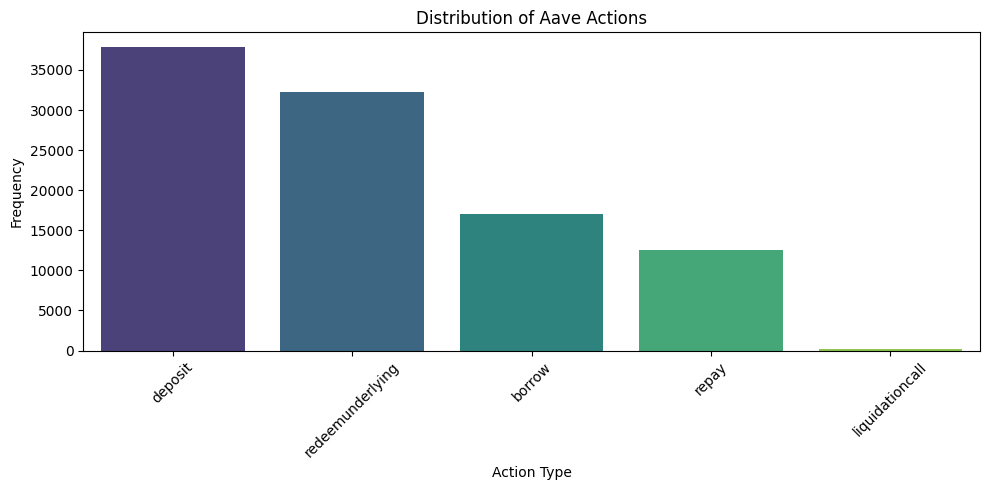

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot action distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='action', order=df['action'].value_counts().index, palette="viridis")
plt.title("Distribution of Aave Actions")
plt.xlabel("Action Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Extract Useful Fields from actionData

In [11]:
# Show random 5 samples of actionData to inspect
df['actionData'].sample(5, random_state=1).tolist()


[{'type': 'Deposit',
  'amount': '3461840',
  'assetSymbol': 'USDC',
  'assetPriceUSD': '0.9750325084015670781190018261885906',
  'poolId': '0x2791bca1f2de4661ed88a30c99a7a9449aa84174',
  'userId': '0x0309146e7b8baefa23f193632ef74602768af954'},
 {'type': 'RedeemUnderlying',
  'amount': '5993522969053941002',
  'assetSymbol': 'DAI',
  'assetPriceUSD': '0.9927059078050723823838847541071374',
  'poolId': '0x8f3cf7ad23cd3cadbd9735aff958023239c6a063',
  'userId': '0x445fe580ef8d70ff569ab36e80c647af338db351',
  'toId': '0x05c9db563db8e38cc2899297da41ce430b61a484'},
 {'type': 'Deposit',
  'amount': '7000000000000000000000',
  'assetSymbol': 'WMATIC',
  'assetPriceUSD': '0.3502180353000000827109933968010195',
  'poolId': '0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270',
  'userId': '0x00b591bc2b682a0b30dd72bac9406bfa13e5d3cd'},
 {'type': 'RedeemUnderlying',
  'amount': '14873708436513534854639',
  'assetSymbol': 'DAI',
  'assetPriceUSD': '1.00117050174492967442352922796348',
  'poolId': '0x8f3cf7a

###  Flatten the actionData dictionary into new columns

In [12]:
# Convert actionData dict into separate columns
action_details_df = pd.json_normalize(df['actionData'])

# Merge with the original DataFrame
df_flat = pd.concat([df.drop(columns=['actionData']), action_details_df], axis=1)

df_flat.head()


,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,__v,...,repayerId,liquidatorId,collateralAmount,collateralAssetPriceUSD,principalAmount,borrowAssetPriceUSD,collateralReserveId,collateralReserveSymbol,principalReserveId,principalReserveSymbol
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,1629178166,1629178166,deposit,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,1621525013,1621525013,deposit,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,1627118913,1627118913,deposit,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,1627773318,1627773318,deposit,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,1618845907,1618845907,redeemunderlying,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_flat.columns = df_flat.columns.str.lower()
df_flat.rename(columns={'type': 'action_type'}, inplace=True)


#### Inspect structure and unique action types

In [16]:
print("🔍 Unique Action Types:", df_flat['action_type'].unique())


🔍 Unique Action Types: ['Deposit' 'RedeemUnderlying' 'Borrow' 'Repay' 'LiquidationCall']


#### Convert data types

In [18]:

# Column names are lowercase and trimmed for consistency
df_flat.columns = df_flat.columns.str.lower().str.strip()

# Convert amount and assetPriceUSD to numeric
df_flat['amount'] = pd.to_numeric(df_flat['amount'], errors='coerce')
df_flat['assetpriceusd'] = pd.to_numeric(df_flat['assetpriceusd'], errors='coerce')

# Compute USD value (amount * price)
df_flat['amount_usd'] = df_flat['amount'] * df_flat['assetpriceusd']

# Convert timestamp columns to datetime
df_flat['timestamp'] = pd.to_datetime(df_flat['timestamp'], unit='s', errors='coerce')



In [20]:
df_flat.head()

,_id,userwallet,network,protocol,txhash,logid,timestamp,blocknumber,action,__v,...,liquidatorid,collateralamount,collateralassetpriceusd,principalamount,borrowassetpriceusd,collateralreserveid,collateralreservesymbol,principalreserveid,principalreservesymbol,amount_usd
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.987664e+09
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.856945e+20
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.223773e+14
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.229933e+15
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.026161e+05


In [21]:
print("Columns:", df.columns.tolist())

Columns: ['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId', 'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt', 'updatedAt']


### Drop unneeded Columns for Clarity and Feature Engineering

In [22]:
# Drop unneeded columns
cols_to_drop = ['_id', 'txHash', 'logId', '__v', 'createdAt', 'updatedAt', 'network', 'protocol']
df = df.drop(columns=cols_to_drop)

# Rename userWallet to userid for consistency
df = df.rename(columns={'userWallet': 'userid'})


In [24]:
print("Columns:", df.columns.tolist())

Columns: ['userid', 'timestamp', 'blockNumber', 'action', 'actionData']
